# Bundesliga data Exploration
## by Frederik Riess

## Preliminary Wrangling

> The 1. Bundesliga was founded in 1962 and is the german national football league. This dataset consists of collected statistics from Bundesliga matches over the past 15 seasons. With 4356 matches and 141 variables there is a lot of data to analyse. While most variables are betting ods, I concentrate on other match statistics which may be important for a match result. The aim is to find out, whether there are existing dependencies which let conclude for a win of a team. The data itself was taken from https://www.football-data.co.uk/germanym.php .

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Extract

In [2]:
for data in range(16):
    curr_df = pd.read_csv('Bundesliga_data/season'+ str(data) + '.csv')
    if data == 1:
        df = curr_df.copy()
    elif data != 0: 
        df = df.append(curr_df)

In [3]:
# Get first info about the shape and dimensions
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4356 entries, 0 to 71
Columns: 141 entries, Div to AvgCAHA
dtypes: float64(118), int64(16), object(7)
memory usage: 4.7+ MB


### Clean

In [4]:
# Keep used columns, drop other columns
df = df[['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'HST', 'AS', 'AST']]

df.head()

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,HST,AS,AST
0,2,0,H,1,0,H,12,9,16,7
1,1,1,D,0,1,A,26,19,10,5
2,3,0,H,2,0,H,20,11,8,5
3,2,1,H,1,0,H,11,5,19,9
4,2,0,H,0,0,D,13,8,11,7


In [5]:
# Change name of the categories for better understanding
df['FTR'] = df['FTR'].map({'H': 'Home', 'D': 'Draw', 'A': 'Away'})
df['HTR'] = df['HTR'].map({'H': 'Home', 'D': 'Draw', 'A': 'Away'})
df.head()

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,HST,AS,AST
0,2,0,Home,1,0,Home,12,9,16,7
1,1,1,Draw,0,1,Away,26,19,10,5
2,3,0,Home,2,0,Home,20,11,8,5
3,2,1,Home,1,0,Home,11,5,19,9
4,2,0,Home,0,0,Draw,13,8,11,7


In [6]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4356 entries, 0 to 71
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FTHG    4356 non-null   int64 
 1   FTAG    4356 non-null   int64 
 2   FTR     4356 non-null   object
 3   HTHG    4356 non-null   int64 
 4   HTAG    4356 non-null   int64 
 5   HTR     4356 non-null   object
 6   HS      4356 non-null   int64 
 7   HST     4356 non-null   int64 
 8   AS      4356 non-null   int64 
 9   AST     4356 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 374.3+ KB


In [7]:
# Write in a new .csv file for explanatory analysis
df.to_csv('bundesliga_data.csv', index=False)

### What is the structure of your dataset?

> I dropped some variables which I will not analyse. Thus, the dataset consists of 4356 matches which all contain the following features:
> - FTHG = Full time Home Goals
> - FTAG = Full time Away Goals
> - FTR = Full time result
> - HTHG = Half time Home Goals
> - HTAG = Half time Away Goals
> - HTR = Half time result
> - HS = Shots by the home team
> - AS = Shots by the away team
> - HST = Shots on target by the home team
> - AST = Shots on target by the away team
> - Source: https://www.football-data.co.uk/notes.txt



### What is/are the main feature(s) of interest in your dataset?

> The main feature I want to focus on are the full time results. I want to figure out whether there are some interesting dependencies between the result and other variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think important features will be the number of scored goals and the Half time result. The more goals you score the higher the probabilty of winning a match. On the other hand, if a team has a lot of shots on target, the number of scored goals should be higher.

## Exploration


### UNIVARIATE EXPLORATION

The first step is to look at the distributions of the variables. Since the results are the important objective to analyse, I count the occurence of Home wins, Draws and Away wins.

In [8]:
# Set the base color
base_color = sb.color_palette()[0]

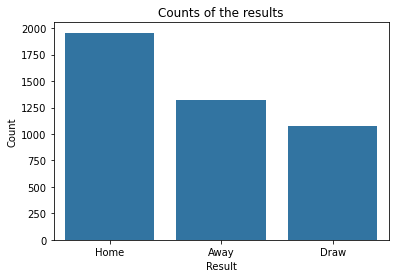

In [9]:
sb.countplot(data=df, x='FTR', order = df['FTR'].value_counts().index, color=base_color);
plt.title('Counts of the results')
plt.xlabel('Result');
plt.ylabel('Count');

There are some more home wins than the other results. To have a better look of the distribution of the results we can take a pie chart.

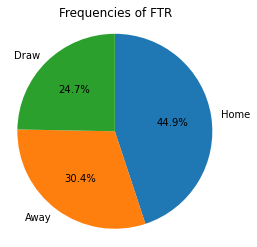

In [10]:
# Frequencies of the full time results
sorted_counts = df['FTR'].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title('Frequencies of FTR');
plt.axis('square');

From all played matches nearly the half of it was won by the Home Team while the other result nearly have the same frequency.
The next step is to look at the distribution of other variables, because we later want to find relationships between them.

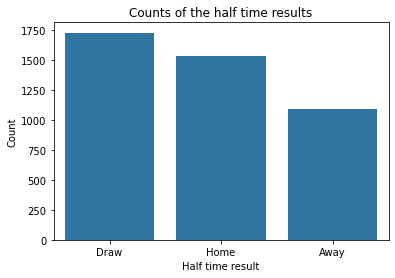

In [11]:
sb.countplot(data=df, x='HTR', order = df['HTR'].value_counts().index, color=base_color);
plt.title('Counts of the half time results')
plt.xlabel('Half time result');
plt.ylabel('Count');

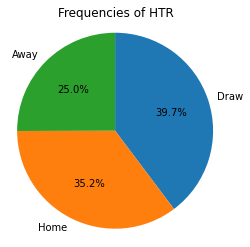

In [36]:
# Frequencies of the full time results
sorted_counts = df['HTR'].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title('Frequencies of HTR');
plt.axis('square');

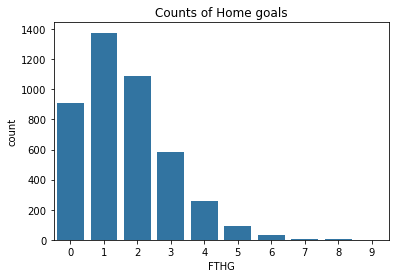

In [13]:
# Full time Home Goals
plt.title('Counts of Home goals')
sb.countplot(data=df, x='FTHG', color=base_color);

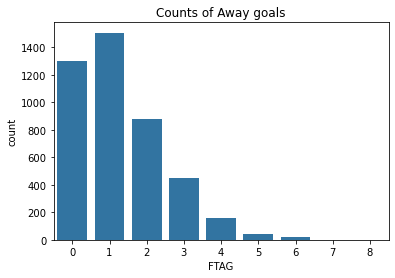

In [14]:
# Full time Away Goals
plt.title('Counts of Away goals')
sb.countplot(data=df, x='FTAG', color=base_color);

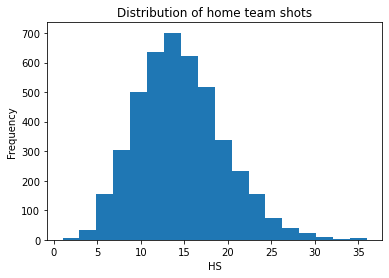

In [15]:
# Distribution of home team shots
plt.title('Distribution of home team shots')
plt.xlabel('HS')
plt.ylabel('Frequency')
plt.hist(df['HS'], bins=18);

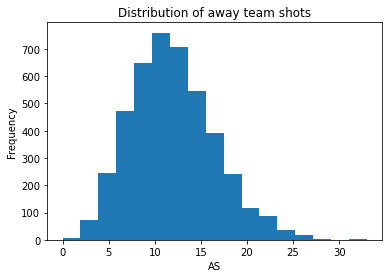

In [16]:
# Distribution of away team shots
plt.title('Distribution of away team shots')
plt.xlabel('AS')
plt.ylabel('Frequency')
plt.hist(df['AS'], bins=17);

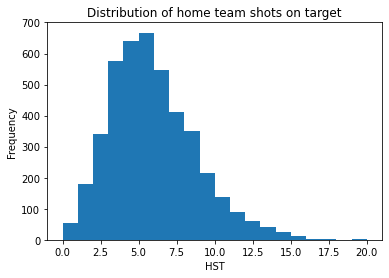

In [17]:
# Distribution of home team shots on target
plt.title('Distribution of home team shots on target')
plt.xlabel('HST')
plt.ylabel('Frequency')
plt.hist(df['HST'], bins=20);

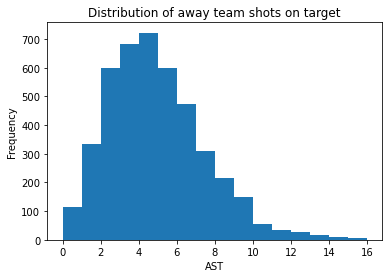

In [18]:
# Distribution of away team shots on target
plt.title('Distribution of away team shots on target')
plt.xlabel('AST')
plt.ylabel('Frequency')
plt.hist(df['AST'], bins=16);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Nearly half of the full time results were home wins while at the half time results draws and home wins are on quite the same level. Most of the time at least one goal was scored by the home team and there are also cases where the home team scored more than 6 goals. The same happens to the scored goals by away teams, but there are way more matches were the away team did not score any goal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions, beside that there is a low number of scoring more than 6 goals.

## Bivariate Exploration


First we take a look at possible dependencies between the half and full time result.

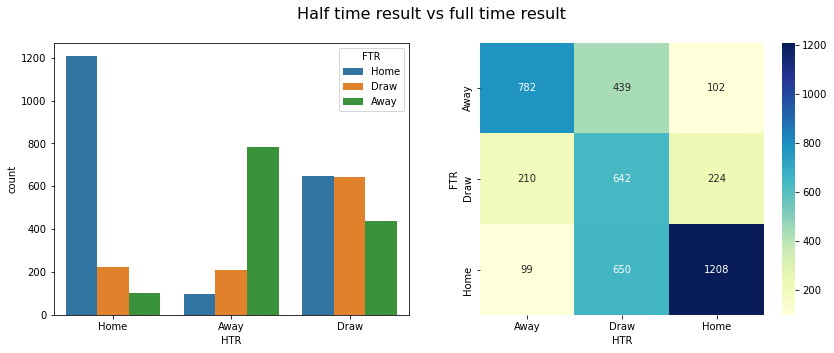

In [19]:
fig = plt.figure(figsize=[14,5])
fig.suptitle('Half time result vs full time result', fontsize=16)

# Countplot for half and full time result
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'HTR', hue = 'FTR');

# Heatmap for half and full time result
plt.subplot(1, 2, 2)
ct_counts = df.groupby(['FTR', 'HTR']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'FTR', columns = 'HTR', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd', cmap="YlGnBu");

Interestingly, if the home team leads in the first half, there is a pretty high number of wins by the home team at full time. There is also a quite high number of away team wins when they also lead in the first half. If the result is draw during half time, it seems like the final result is not quite predictable. 


Next we want to check whether there are dependencies between the full time result and other variables. First variable to observe is the number of scored home goals.

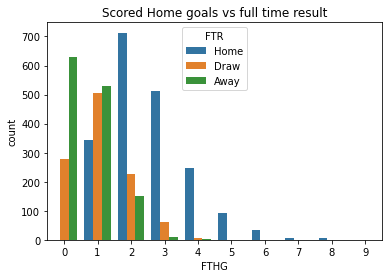

In [20]:
# Scored home goals vs result
plt.title('Scored Home goals vs full time result')
sb.countplot(data = df, x = 'FTHG', hue = 'FTR');

If the home team scores no goal, the number of wins by the away team are quite high. Thus, if the home team scores at least three goals, the probability of winning is also quite high. 

Calculation:

In [21]:
total = len(df[df['FTHG'] == 3])
win = len(df[(df['FTHG'] == 3) & (df['FTR'] == "Home")])
print("Percentage of wins by the home team with 3 scored goals: ", win/total*100, "%")


Percentage of wins by the home team with 3 scored goals:  87.5 %


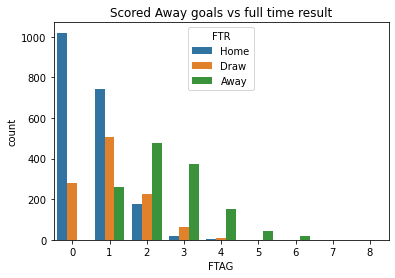

In [22]:
# Scored away goals vs result
plt.title('Scored Away goals vs full time result')
sb.countplot(data = df, x = 'FTAG', hue = 'FTR');

Like before, if the away team does not score any goal, the number of home wins is very high.

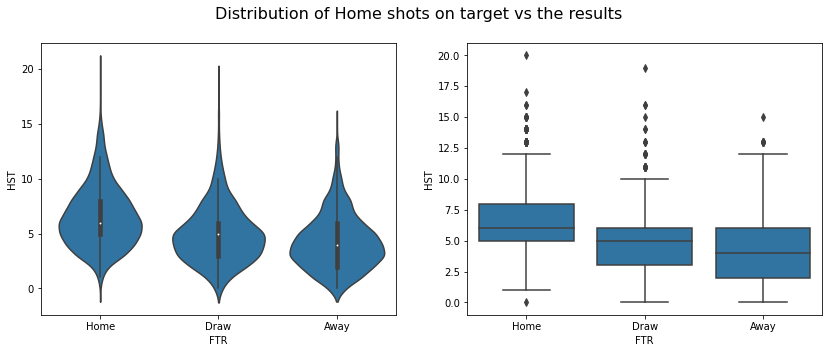

In [23]:
# Violin plot for Home shots on target regarding the full time result
fig = plt.figure(figsize=[14,5])
fig.suptitle('Distribution of Home shots on target vs the results', fontsize=16)

plt.subplot(1, 2, 1)
sb.violinplot(data=df, x='FTR', y='HST', color=base_color);

plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='FTR', y='HST', color=base_color);

The more home shots on target, the more home wins. There are also some outliers with many shots on target. It catches the eye that there is one outlier with zero home shots on goal, thus the home team won.

In [24]:
df[(df['HST']==0) & (df['FTR']=="Home")]

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,HST,AS,AST
115,1,0,Home,1,0,Home,1,0,7,0


After some research I found out that this game was in 2015, where the home team won just because of an own goal from the away team. Luckily they did not need a single shot on target to win the game.

Next we are going to look at the distribution of the away shots on target.

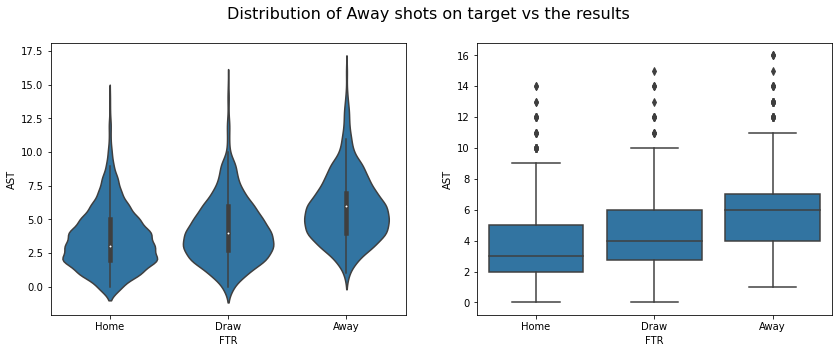

In [25]:
# Violin plot for Home shots on target regarding the full time result
fig = plt.figure(figsize=[14,5])
fig.suptitle('Distribution of Away shots on target vs the results', fontsize=16)

plt.subplot(1, 2, 1)
sb.violinplot(data=df, x='FTR', y='AST', color=base_color);

plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='FTR', y='AST', color=base_color);

As expected, more away shots on target lead to more away wins.

Because of these observations, there should be a relationship between the shots on target and the number of scored goals.

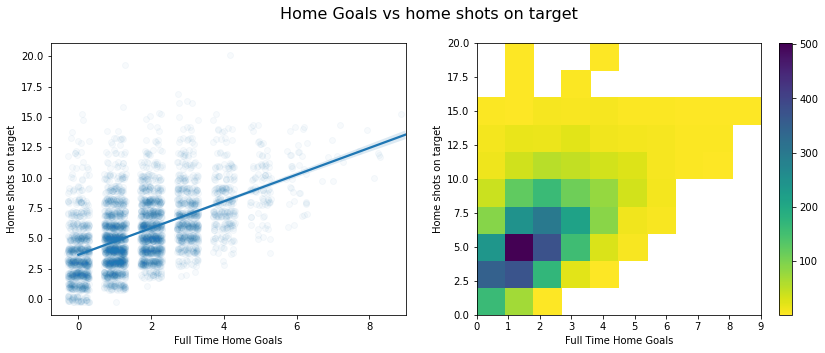

In [26]:
# Home Goals vs home shots on target

fig = plt.figure(figsize=[14,5])
fig.suptitle('Home Goals vs home shots on target', fontsize=16)

plt.subplot(1, 2, 1)

sb.regplot(data = df, x = 'FTHG', y = 'HST', x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha':1/30});
plt.xlabel('Full Time Home Goals')
plt.ylabel('Home shots on target');

plt.subplot(1, 2, 2)
plt.hist2d(data = df, x = 'FTHG', y = 'HST', cmin=0.5, cmap='viridis_r');
plt.colorbar()
plt.xlabel('Full Time Home Goals')
plt.ylabel('Home shots on target');

As expected it seems to be that there is a linear dependency between the home shots on target and the scored home goals. Let's look if there is the same observation at the away shots on target vs the scored away goals.

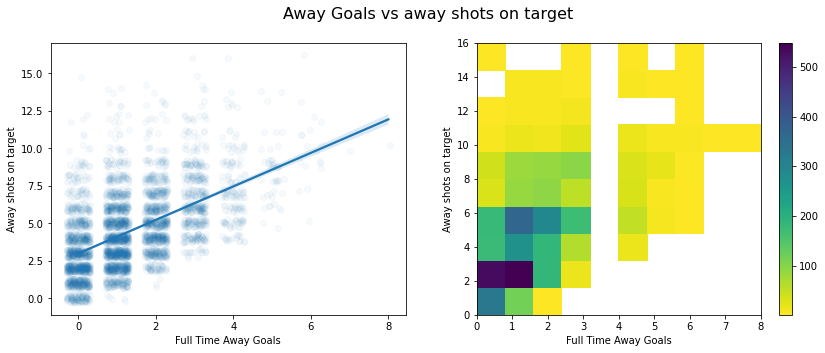

In [27]:
# Home Goals vs home shots on target

fig = plt.figure(figsize=[14,5])
fig.suptitle('Away Goals vs away shots on target', fontsize=16)

plt.subplot(1, 2, 1)

sb.regplot(data = df, x = 'FTAG', y = 'AST', x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha':1/30});
plt.xlabel('Full Time Away Goals')
plt.ylabel('Away shots on target');

plt.subplot(1, 2, 2)
plt.hist2d(data = df, x = 'FTAG', y = 'AST', cmin=0.5, cmap='viridis_r');
plt.colorbar()
plt.xlabel('Full Time Away Goals')
plt.ylabel('Away shots on target');

We also observe that there is a small linear dependency between the away shots on target and the scored away goals. 

The next thing that could influence the match result is the difference between home shots on target vs the away shots on target.

A positive shot difference means, that the home team shot at least one more time on target than the away team. A negative shot difference includes the opposite case.

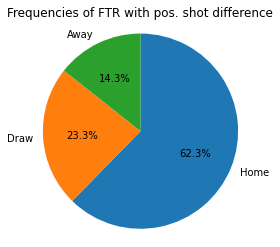

In [28]:
# Distribution of results with a positive shot diff
df_pos_shot_diff = df[(df['HST']-df['AST']) > 0]
sorted_counts = df_pos_shot_diff['FTR'].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title('Frequencies of FTR with pos. shot difference');
plt.axis('square');

Over 60% of the matches were won by the home team, if the team had a positive shot difference. More impressive is that just around 14% of these matches were won by the away team.

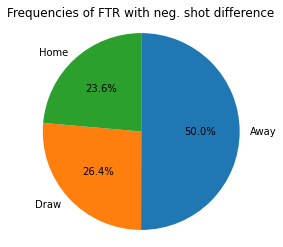

In [29]:
# Distribution of results with a negative shot diff
df_neg_shot_diff = df[(df['HST']-df['AST']) <= 0]
sorted_counts = df_neg_shot_diff['FTR'].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title('Frequencies of FTR with neg. shot difference');
plt.axis('square');

If the home team had a negative shot difference, 50% of the matches were won by the away team. Thus, there were also around 23% wins by the home team.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was interesting to see that the full time result strongly depends on the half time result. If the home team scores at least three goals, there is a quite high number of wins by the home team.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was an outlier with zero home shots on target, thus the home team won. After investigation in the internet I found out, that the away team scored an own goal. I also calculated the shot difference on target and wanted to know if it had an impact on the full time result. Just around 14% of the matches were won by the away team, if the home team had a positive shot difference. Moreover, there seems to be a linear dependency between the shots on targets and the scored goals.

### Multivariate Exploration

First, lets gather a quick look at the relationships of different quantitative variables.

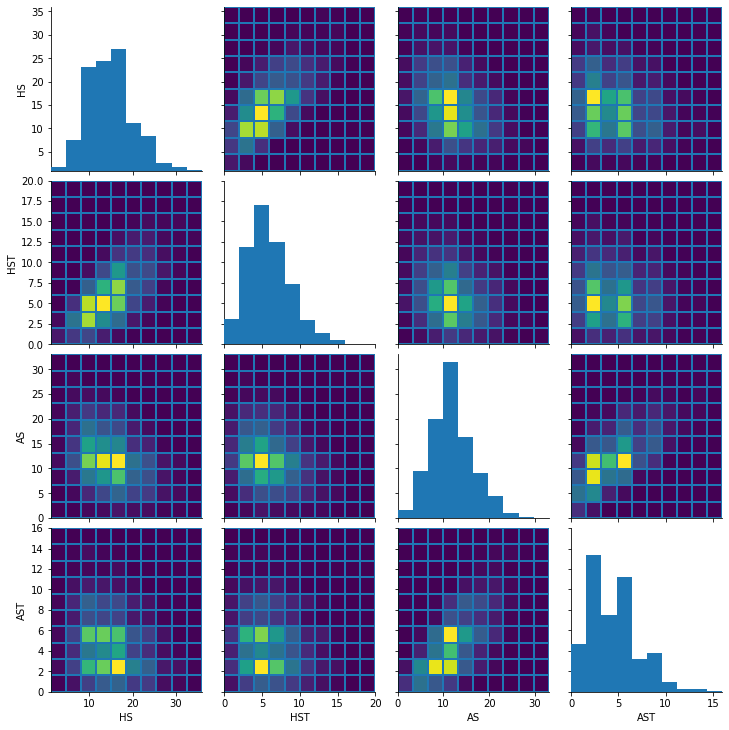

In [30]:
# Pairgrid for quantitative variables
g = sb.PairGrid(data = df, vars = ['HS', 'HST', 'AS', 'AST'])
g.map_diag(plt.hist)
g.map_offdiag(plt.hist2d);

There is a small linear relationship between 
- Home shots on target and home shots
- Away shots on target and away shots

With a heatmap we can check the correlation coefficients.

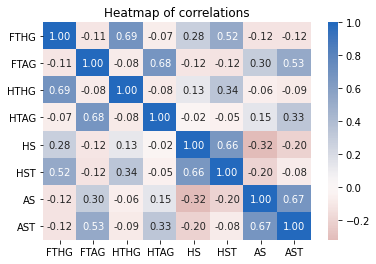

In [31]:
# Heatmap of the correlations
plt.title('Heatmap of correlations')
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

Indeed, shots and shots on target have a linear relationship. 

If we again look at the shot difference from the shots on target, there are also some interesting observations regarding the half and full time result.

In [32]:
# Calculate shot difference
df['diff'] = df['HST']-df['AST']

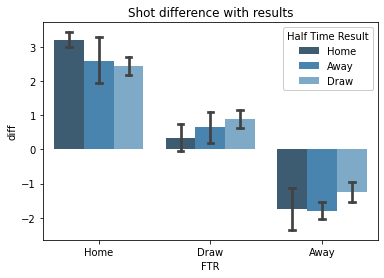

In [33]:
# Plot the shot difference regarding the results
plt.title('Shot difference with results')
ax = sb.barplot(data = df, x = 'FTR', y = 'diff', hue = 'HTR', palette="Blues_d", capsize=.05)
ax.legend(loc = 0, ncol = 1, framealpha = 1, title = 'Half Time Result');

This looks pretty interesting. To take a deeper look at the values, lets create a heatmap.

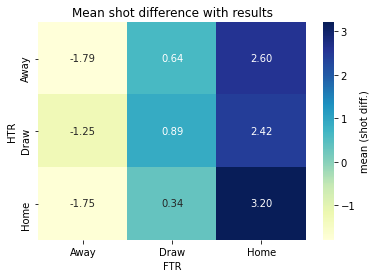

In [34]:
# Plot the mean shot difference regarding the results
plt.title('Mean shot difference with results')
diff_means = df.groupby(['FTR', 'HTR']).mean()['diff']
diff_means = diff_means.reset_index(name = 'num_var2_avg')
diff_means = diff_means.pivot(index = 'HTR', columns = 'FTR',
                            values = 'num_var2_avg')
sb.heatmap(diff_means, annot = True, fmt = '.2f',
           cbar_kws = {'label' : 'mean (shot diff.)'}, cmap="YlGnBu");

- If the home team wins, the mean shot difference is above 2.4.
- If the result is a draw, the mean shot differnce ist between 0 and 1.
- If the away team wins, the mean shot difference is below -1.

Those observations are true, independet from the half time result. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a linear relationship between shots and shots on target. Dependencies of the half-/ full time result and the shot difference were observed. If the half and full time result are the same, the mean shot difference is the highest within each result. A mean shot difference between 0 and 1 seems to lead to a draw.

### Were there any interesting or surprising interactions between features?

> There were no surprising interactions between features other than the mentioned ones.